In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("D:\Machine Learning\desafio-valorian\dataset\dataset.csv").drop(columns = ["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098209 entries, 0 to 1098208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Individuo  1098209 non-null  int64  
 1   Atividade  1098209 non-null  object 
 2   Timestamp  1098209 non-null  int64  
 3   ax         1098209 non-null  float64
 4   ay         1098209 non-null  float64
 5   az         1098158 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [3]:
print((df["Timestamp"] == 0).value_counts()) 
print()
print((df["Timestamp"] < 0).value_counts()) 

False    1085364
True       12845
Name: Timestamp, dtype: int64

False    1098209
Name: Timestamp, dtype: int64


In [4]:
(df["Timestamp"]%1000 == 0).all()

True

In [5]:
df["Timestamp"] = df["Timestamp"]//1000 # passando de nano segundo para microsegundo

In [6]:
individuos = np.unique(df["Individuo"],return_counts = True)
print(individuos)
individuos = individuos[0]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64), array([29978, 23525, 35161, 11371, 28510, 29704, 30967, 41188, 12923,
       34883, 31659, 32641, 37093, 38192, 28155, 20470, 22020, 32812,
       45383, 56632, 35436, 22310, 25673, 25736, 13468, 32578, 34959,
       21358, 38245, 25335, 44282, 35506, 29453, 35948, 22394, 32261],
      dtype=int64))


In [7]:
atividades = np.unique(df["Atividade"],return_counts = True)
print(atividades)
atividades = atividades[0]

(array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object), array([100427, 342179,  59939,  48395, 122869, 424400], dtype=int64))


C:\Users\rodri\AppData\Local\Temp\ipykernel_4852\1635964829.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]
C:\Users\rodri\AppData\Local\Temp\ipykernel_4852\1635964829.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]
C:\Users\rodri\AppData\Local\Temp\ipykernel_4852\1635964829.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]
C:\Users\rodri\AppData\Local\Temp\ipykernel_4852\1635964829.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]
C:\Users\rod

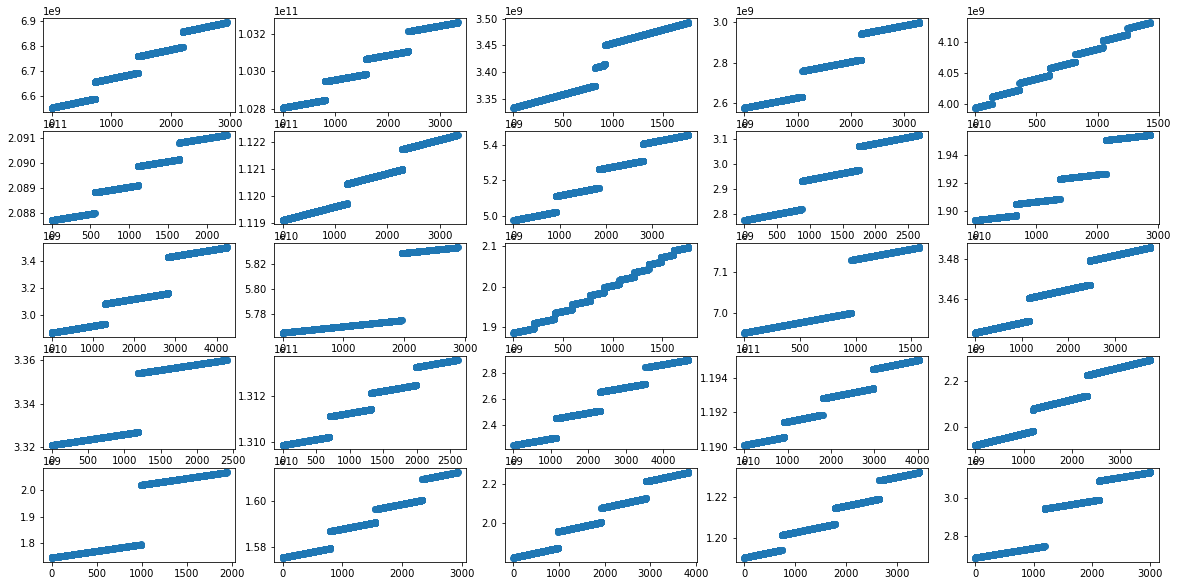

In [8]:
plt.figure(figsize = (20,10))
i = 1
n_mon = 0
for atividade in atividades:
    for individuo in individuos:
        df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]
        if len(df_move) == 0:continue
        
        plt.subplot(5,5,i)
        plt.plot(df_move["Timestamp"][df_move["Timestamp"] > 0].values,"o")
        
        i+=1
        
        if i ==26: break
        
        
    if i ==26: break    
                
plt.show()

In [9]:
# observando cada individuo em sua atividade
# queremos determinar o padrão 
i = 1
n_mon = 0
for atividade in atividades:
    for individuo in individuos:
        df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]
        if len(df_move) == 0:
            continue
        
        monotonico = df_move["Timestamp"].is_monotonic_increasing #or df_move["Timestamp"].is_monotonic_decreasing
        
        if not monotonico:  n_mon += 1
        
             
print("n° de monotonicos:",n_mon)       

C:\Users\rodri\AppData\Local\Temp\ipykernel_4852\1136614489.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az"]]


n° de monotonicos: 43


In [10]:
movements = []
y = []
i = 1
for atividade in atividades:
    for individuo in individuos:
        df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az","Atividade"]]
        if len(df_move) == 0:
            continue
        
        diferencas = df_move["Timestamp"].diff() 
        dif_comum = diferencas.median()
        
        quebras = np.where(diferencas > 5*dif_comum)[0]
        print('N° quebras:', len(quebras))
       
        quebra_prev = 0
        for quebra in quebras:
            
            if quebra_prev < quebra:
                movements.append(df_move.iloc[quebra_prev:quebra])

            quebra_prev = quebra

        movements.append(df_move.iloc[quebra_prev:])   
        


    

C:\Users\rodri\AppData\Local\Temp\ipykernel_4852\547148209.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_move = df[df["Atividade"] == atividade][df["Individuo"] == individuo][["Timestamp","ax","ay","az","Atividade"]]


N° quebras: 4
N° quebras: 4
N° quebras: 3
N° quebras: 2
N° quebras: 7
N° quebras: 5
N° quebras: 9
N° quebras: 4
N° quebras: 2
N° quebras: 15
N° quebras: 2
N° quebras: 2
N° quebras: 11
N° quebras: 1
N° quebras: 2
N° quebras: 5
N° quebras: 5
N° quebras: 3
N° quebras: 10
N° quebras: 3
N° quebras: 1
N° quebras: 3
N° quebras: 3
N° quebras: 12
N° quebras: 2
N° quebras: 43
N° quebras: 2
N° quebras: 4
N° quebras: 78
N° quebras: 6
N° quebras: 3
N° quebras: 3
N° quebras: 1
N° quebras: 1
N° quebras: 1
N° quebras: 0
N° quebras: 0
N° quebras: 535
N° quebras: 19
N° quebras: 24
N° quebras: 1
N° quebras: 0
N° quebras: 16
N° quebras: 612
N° quebras: 1
N° quebras: 1344
N° quebras: 1
N° quebras: 486
N° quebras: 2
N° quebras: 1267
N° quebras: 8
N° quebras: 0
N° quebras: 1
N° quebras: 2
N° quebras: 0
N° quebras: 1
N° quebras: 731
N° quebras: 882
N° quebras: 2
N° quebras: 950
N° quebras: 9
N° quebras: 1
N° quebras: 1
N° quebras: 84
N° quebras: 0
N° quebras: 0
N° quebras: 0
N° quebras: 0
N° quebras: 0
N° que

In [11]:
print("numero de movimentos: ",len(movements))
print("movimento0:\n", movements[0])

numero de movimentos:  8188
movimento0:
          Timestamp     ax     ay    az   Atividade
966746  6552942304  -0.15   9.15 -0.34  Downstairs
966747  6552992292   0.11   9.19  2.76  Downstairs
966748  6553042310  -4.06   7.40  4.02  Downstairs
966749  6553092298  -2.87   7.93  3.21  Downstairs
966750  6553142347  -0.19  10.04  4.82  Downstairs
...            ...    ...    ...   ...         ...
967470  6589122297  -6.47   5.33  0.95  Downstairs
967471  6589172345 -10.00   5.13  3.02  Downstairs
967472  6589222333 -14.29   1.08  4.75  Downstairs
967473  6589272321  -8.24   3.11 -1.04  Downstairs
967474  6589322339  -2.14   6.36 -0.72  Downstairs

[729 rows x 5 columns]


## Primeira abordagem será tentar separar os movimentos em tempos de 3s com overlap de 75% usando o tempo do timestamp.

In [12]:
# overlap de 75% com 3s cada.
# entao devemos fazer trechos novos a cada 0.25*3s
print("distancia temporal sem overlap entre as samples:", 3_000_000*0.25)

distancia temporal sem overlap entre as samples: 750000.0


A busca pelas secções de 3s nesta próxima célua deve ser modificada para usar binary search como subrotina, isso deve diminuir o tempo de criação do dataset com os valores exatos.

In [30]:
X_exato = []
y_exato = []

delta_t = int(3_000_000*0.25)
time_window_size = 3_000_000

print(f"numero de movimentos: {len(movements)}")

for move_number,move in enumerate(movements):
    print(f"move n° {move_number}")

    # movimentos observados por pelo menos 3s
    if move["Timestamp"].max() - move["Timestamp"].min() > 3_000_000:
        
        # vamos comecar a contar do 0
        move["Timestamp"] = move["Timestamp"] - move["Timestamp"].min()
       
        # olhar os movimentos começando do primeiro instante ate o ultimo
        # apos registrar um instante olhamos o proximo a delta_t microsegundos depois
        start_index = 0
        end_index   = 0

        for end_moment_window in range(time_window_size,move["Timestamp"].max(), delta_t):
            # movimento de 3s: o comeco ocorre 3s antes do final
            start_moment_window = end_moment_window - time_window_size
            
            # acho o indice que corresponde ao comeco da janela de tempo do movimento
            while move["Timestamp"].iloc[start_index] < start_moment_window:
                start_index += 1 
                    
            # acho o indice que corresponde ao final da janela de tempo do movimento
            while end_index < len(move) and move["Timestamp"].iloc[end_index] < end_moment_window:
                end_index += 1
            
            # matriz com cada linha sendo ax, ay, az
            # e cada coluna sendo uma medicao no tempo
            move_window = move.iloc[start_index : end_index][["ax","ay","az","Atividade"]]
            
            if len(move_window) == 0: 
                continue
            
            # transformando a matriz em um array de features
            move_window = move_window.to_numpy().reshape(-1,)
            X_exato.append(move_window)
            y_exato.append(move_window["Atividade"][0])
        

len(X_exato)

numero de movimentos: 8188
move n° 0
move n° 1
move n° 2
move n° 3
move n° 4
move n° 5
move n° 6
move n° 7
move n° 8
move n° 9
move n° 10
move n° 11
move n° 12
move n° 13
move n° 14
move n° 15
move n° 16
move n° 17
move n° 18
move n° 19
move n° 20
move n° 21
move n° 22
move n° 23
move n° 24
move n° 25
move n° 26
move n° 27
move n° 28
move n° 29
move n° 30
move n° 31
move n° 32
move n° 33
move n° 34
move n° 35
move n° 36
move n° 37
move n° 38
move n° 39
move n° 40
move n° 41
move n° 42
move n° 43
move n° 44
move n° 45
move n° 46
move n° 47
move n° 48
move n° 49
move n° 50
move n° 51
move n° 52
move n° 53
move n° 54
move n° 55
move n° 56
move n° 57
move n° 58
move n° 59
move n° 60
move n° 61
move n° 62
move n° 63
move n° 64
move n° 65
move n° 66
move n° 67
move n° 68
move n° 69
move n° 70
move n° 71
move n° 72
move n° 73
move n° 74
move n° 75
move n° 76
move n° 77
move n° 78
move n° 79
move n° 80
move n° 81
move n° 82
move n° 83
move n° 84
move n° 85
move n° 86
move n° 87
move n° 88
move

KeyboardInterrupt: 

Como podemos ver, teremos muitas irregularidades no numero de features se seguirmos esta abordagem. Além disso será necessário melhorar a busca pelos time stamps que compõem o intervalo de 3s buscado para que o código termine mais rápido.

## Vamos então seguir a abordagem de fazer um numero fixo de features. Como temos 3 aceleracoes, 3 segundos e 20 medicoes por segundo aproximadamente, teremos 3 * 3 * 20 * = 180 features  

In [13]:
X_aprox = []
y_aprox = []
delta_t = int(0.25*180)
time_window_size = 180

print(f"numero de movimentos: {len(movements)}")

for move_number,move in enumerate(movements):
    print(f"move n° {move_number}")
    
    # movimentos observados por pelo menos 3s
    if move["Timestamp"].max() - move["Timestamp"].min() > 3_000_000:
        
       
        # olhar os movimentos começando do primeiro instante ate o ultimo
        # apos registrar um instante olhamos o proximo a delta_t microsegundos depois
        

        for end_index in range(time_window_size,len(move["Timestamp"]), delta_t):
            # movimento de 3s: o comeco ocorre 3s antes do final
            start_index = end_index - time_window_size
            
            # matriz com cada linha sendo ax, ay, az
            # e cada coluna sendo uma medicao no tempo
            move_window = move.iloc[start_index : end_index][["ax","ay","az","Atividade"]]
            label = move_window.iloc[0]["Atividade"]
            
            move_window = move_window.drop(columns= ["Atividade"]).to_numpy()            
            ax = move_window[:,0]
            ay = move_window[:,1]
            az = move_window[:,2]
            
            X_aprox.append( np.concatenate( (ax,ay,az), axis =None))
            y_aprox.append( label )
            
            

numero de movimentos: 8188
move n° 0
move n° 1
move n° 2
move n° 3
move n° 4
move n° 5
move n° 6
move n° 7
move n° 8
move n° 9
move n° 10
move n° 11
move n° 12
move n° 13
move n° 14
move n° 15
move n° 16
move n° 17
move n° 18
move n° 19
move n° 20
move n° 21
move n° 22
move n° 23
move n° 24
move n° 25
move n° 26
move n° 27
move n° 28
move n° 29
move n° 30
move n° 31
move n° 32
move n° 33
move n° 34
move n° 35
move n° 36
move n° 37
move n° 38
move n° 39
move n° 40
move n° 41
move n° 42
move n° 43
move n° 44
move n° 45
move n° 46
move n° 47
move n° 48
move n° 49
move n° 50
move n° 51
move n° 52
move n° 53
move n° 54
move n° 55
move n° 56
move n° 57
move n° 58
move n° 59
move n° 60
move n° 61
move n° 62
move n° 63
move n° 64
move n° 65
move n° 66
move n° 67
move n° 68
move n° 69
move n° 70
move n° 71
move n° 72
move n° 73
move n° 74
move n° 75
move n° 76
move n° 77
move n° 78
move n° 79
move n° 80
move n° 81
move n° 82
move n° 83
move n° 84
move n° 85
move n° 86
move n° 87
move n° 88
move

In [14]:
X_aprox = np.array(X_aprox)
print("formato de X: ",X_aprox.shape)
print("exemplo de X:\n",X_aprox[0])


formato de X:  (19516, 540)
exemplo de X:
 [ -0.15   0.11  -4.06  -2.87  -0.19  -0.19  -1.73  -3.3   -5.05  -1.12
   2.56  -3.15  -5.43  -3.87  -1.53   2.45   0.57   0.08  -2.26  -1.46
   0.27  -3.06  -6.05  -5.43  -3.49  -4.33  -3.36  -0.61   0.84   0.11
  -5.24  -0.53   2.49  -4.63  -4.86  -0.3    4.99  -1.95  -2.56  -2.6
  -3.49  -4.63  -5.28  -2.96   3.49  -1.46  -2.6    1.31  -4.99  -6.59
  -0.15   6.7   -2.68  -4.75  -2.22  -3.6   -3.49  -8.08  -1.31   5.83
  -0.65  -7.27  -4.4   -1.99   4.21  -1.5   -4.94  -4.56  -5.33  -2.22
  -3.02   1.33   4.18   0.    -7.82  -3.76   3.41   4.29   4.29  -5.48
  -1.61  -3.68  -6.09  -4.59  -3.87   4.86   1.99  -4.75  -4.71  -2.11
  -3.3    8.62  -3.76  -8.62  -5.79  -4.86  -3.6   -5.37  -2.49   4.82
   1.08  -8.01  -9.85  -5.75  -7.12  -7.04  -3.98  -4.99  -0.5   -0.8
  -9.19 -14.14  -7.74  -1.76  -2.91  -5.75  -3.98  -2.91  -7.16  -5.33
  -5.09  -3.53  -0.04  -2.98  -6.47  -7.7   -0.3   -1.46  -9.28 -10.34
 -10.46  -6.36  -6.02  -8.66  -0.15 

In [15]:
y_aprox = np.array(y_aprox)
print("numero de labels: ",len(y_aprox))
print(np.unique(y_aprox, return_counts=True))

numero de labels:  19516
(array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype='<U10'), array([1629, 4922, 1232,  988, 2108, 8637], dtype=int64))


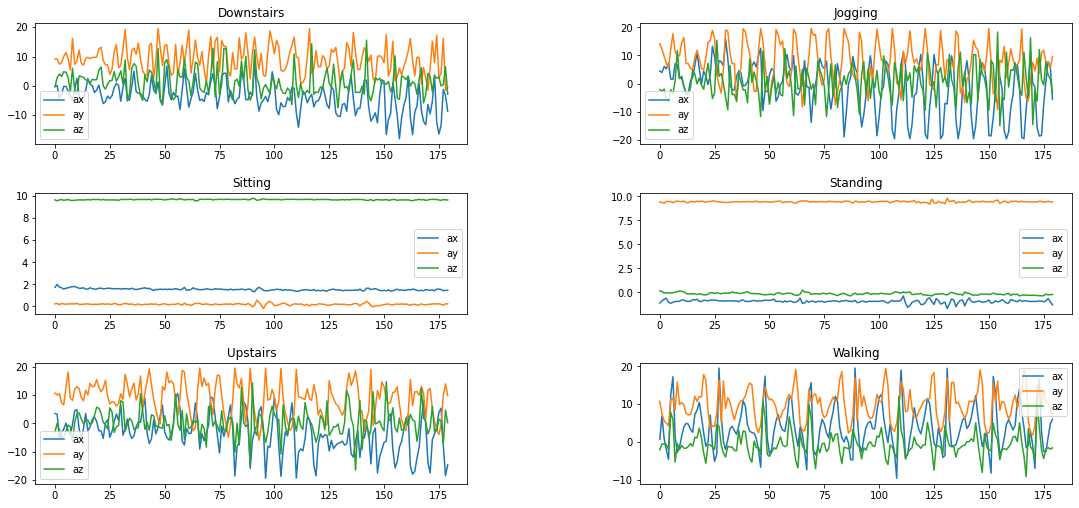

In [16]:
plt.figure(figsize = (18,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i,atividade in enumerate(np.unique(y_aprox)):
    plt.subplot(3,2,i+1)
    plt.title(atividade)
    a = X_aprox[np.where(y_aprox == atividade)][0]
    ax = a[:180]
    ay = a[180:360]
    az = a[360:] 
    
    
    plt.plot(ax,label = "ax")
    plt.plot(ay,label = "ay")
    plt.plot(az,label = "az")
    plt.legend()
    
plt.show()

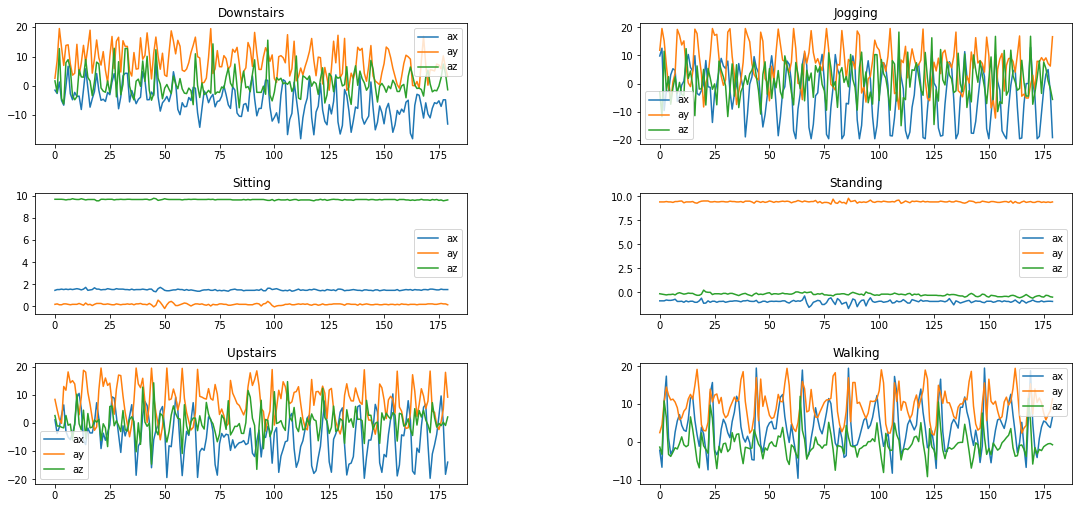

In [17]:
plt.figure(figsize = (18,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i,atividade in enumerate(np.unique(y_aprox)):
    plt.subplot(3,2,i+1)
    plt.title(atividade)
    a = X_aprox[np.where(y_aprox == atividade)][1]
    ax = a[:180]
    ay = a[180:360]
    az = a[360:] 
    
    
    plt.plot(ax,label = "ax")
    plt.plot(ay,label = "ay")
    plt.plot(az,label = "az")
    plt.legend()
    
plt.show()

Com estes gráficos podemos ver que facilmente diferencia-se sitting de standing, pois o movimento na vertical para sentar reduz a gravidade aparente do sensor fazendo com que a aceleração vertical seja próxima a zero, e quando ficamos de pé só temos 1 aceleração significativa (gravidade).

Porém a série de Fourier poderá nos auxiliar com as outras atividades, pelo seu aparente carater periodico

In [19]:

# salvando o dataset
np.save("X_aprox.npy",X_aprox)
np.save("y_aprox.npy",y_aprox)

# Fourier

Os dados parecem seguir um padrão periodico (o que faz sentido para os movimentos de andar, correr e subir/descer escadas). Portanto, a serie de fourier pode ser util para representar estes movimentos com menos features. 

A ideia consiste em trocar do do dominio do tempo para fequencia, na esperança de termos padrões mais simples.

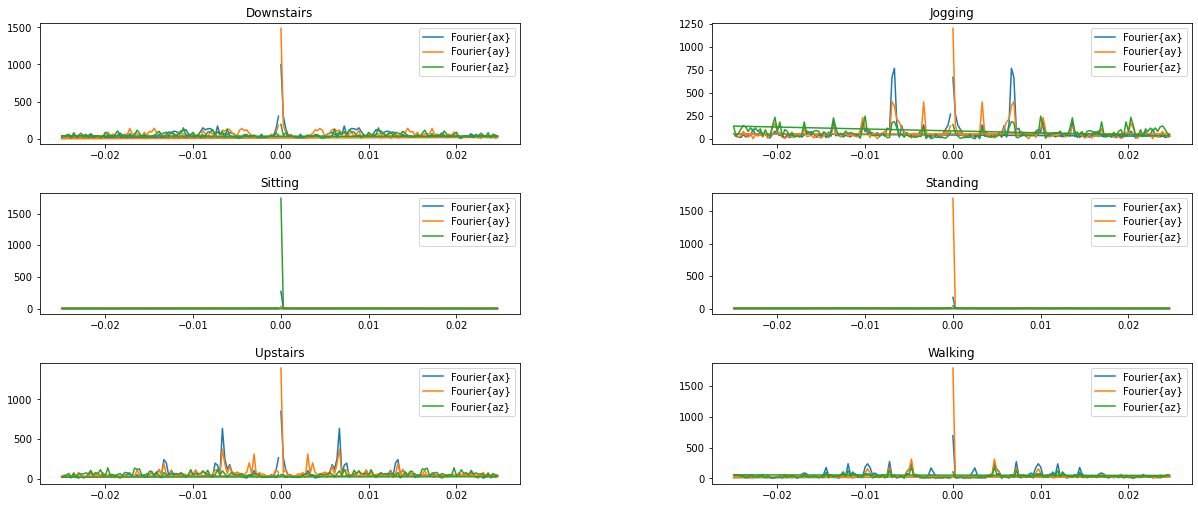

In [33]:
from scipy.fft import fft, fftfreq

SAMPLE_RATE = 1/20


plt.figure(figsize = (20,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i,atividade in enumerate(np.unique(y_aprox)):
    plt.subplot(3,2,i+1)
    plt.title(atividade)
    a = X_aprox[np.where(y_aprox == atividade)][1]
    ax = a[:180]
    ay = a[180:360]
    az = a[360:] 
    
    #ax = (ax - ax.mean())/(ax.max() - ax.min())
    #ay = (ay - ay.mean())/(ay.max() - ay.min())
    #az = (az - az.mean())/(az.max() - az.min())
    
    Fax = fft(ax)
    Fay = fft(ay)
    Faz = fft(az)
    xf = fftfreq(180, 1 / SAMPLE_RATE)

  
     
    plt.plot(xf, np.abs(Fax),label = "Fourier{ax}")
    plt.plot(xf, np.abs(Fay),label = "Fourier{ay}")
    plt.plot(xf, np.abs(Faz),label = "Fourier{az}")
    plt.legend()
    
plt.show()



Comparando os movimentos somente em ax:

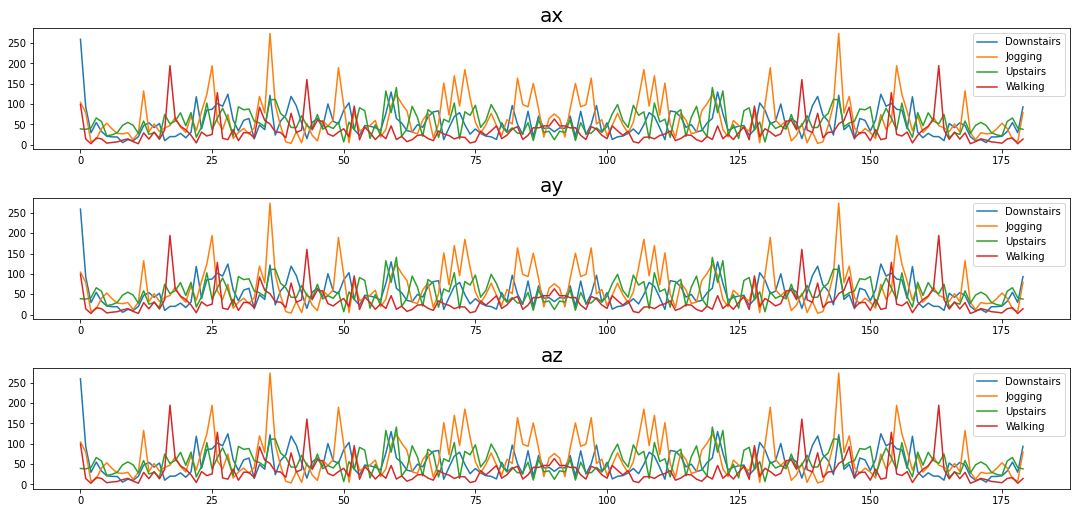

In [58]:
SAMPLE_RATE = 1/20


plt.figure(figsize = (18,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3,1,1)
plt.title("ax", fontsize = 20)
for i,atividade in enumerate(np.unique(y_aprox)):
    if "S" in atividade: continue

    a = X_aprox[np.where(y_aprox == atividade)][0]
    ax = a[360:]
    
    #ax = (ax - ax.mean())/(ax.max() - ax.min())
    
    Fax = fft(ax)
    
    xf = fftfreq(180, 1 / SAMPLE_RATE)
     
    Fax = np.abs(Fax) 
    #Fax = np.sort(Fax)[-10:]
    plt.plot(  Fax ,label = atividade)
    plt.legend()

    

plt.subplot(3,1,2)
plt.title("ay", fontsize = 20)
for i,atividade in enumerate(np.unique(y_aprox)):
    if "S" in atividade: continue

    a = X_aprox[np.where(y_aprox == atividade)][0]
    ay = a[360:]
    
    #ay = (ay - ay.mean())/(ay.may() - ay.min())
    
    Fay = fft(ay)
    
    xf = fftfreq(180, 1 / SAMPLE_RATE)
     
    Fay = np.abs(Fay) 
    #Fay = np.sort(Fay)[-10:]
    plt.plot(  Fay ,label = atividade)
    plt.legend()

    
plt.subplot(3,1,3)
plt.title("az", fontsize = 20)
for i,atividade in enumerate(np.unique(y_aprox)):
    if "S" in atividade: continue

    a = X_aprox[np.where(y_aprox == atividade)][0]
    az = a[360:]
    
    #ax = (ax - ax.mean())/(ax.max() - ax.min())
    
    Faz = fft(az)
    
    xf = fftfreq(180, 1 / SAMPLE_RATE)
     
    Faz = np.abs(Faz) 
    #Faz = np.sort(Faz)[-10:]
    plt.plot(  Faz ,label = atividade)
    plt.legend()

    
plt.show()



Vemos, por exempo que Upstairs e Jogging tem um padra semelhante entre si em ax mas diferente das outras atividades. Em az vemos que Jogging parece ter a maior amplitude de oscilação. Isso pode auxiliar o modelo.

Podemos diminuir e simplificar ainda mais filtrando as oscilações de forma a armazenar apenas as frequencias com amplitudes mais relevantes:

# o ideal era usar o quickselect, mas este deve funcionar rapidamente tambem (array pequeno)
def filtrar_k_maiores(arr,k):
    arr_temp = arr.copy()
    desprezar = arr.min()-1
    indices = []
    while k > 0:
        k -= 1
        index_max = np.argmax(arr_temp)
        arr_temp[index_max] = desprezar
        indices.append(index_max)
    return indices


arr_exemplo = np.array([19,2,3,13,11,4,10,5])
filtrar_k_maiores(arr_exemplo,3)


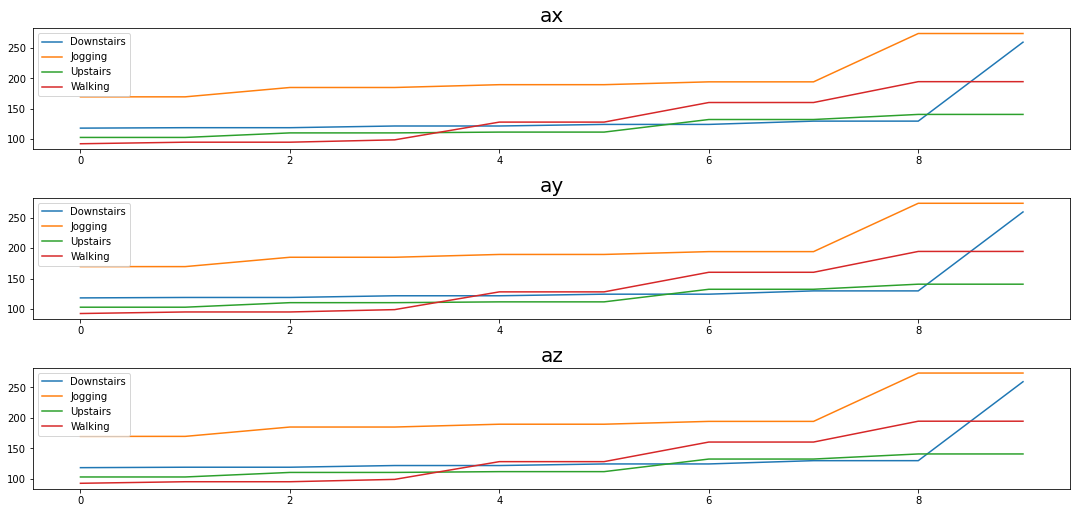

In [59]:
SAMPLE_RATE = 1/20


plt.figure(figsize = (18,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3,1,1)
plt.title("ax", fontsize = 20)
for i,atividade in enumerate(np.unique(y_aprox)):
    if "S" in atividade: continue

    a = X_aprox[np.where(y_aprox == atividade)][0]
    ax = a[360:]
    
    #ax = (ax - ax.mean())/(ax.max() - ax.min())
    
    Fax = fft(ax)
    
    xf = fftfreq(180, 1 / SAMPLE_RATE)
     
    Fax = np.abs(Fax) 
    Fax_10 = filtra(Fax)
    plt.plot(  Fax ,label = atividade)
    plt.legend()

    

plt.subplot(3,1,2)
plt.title("ay", fontsize = 20)
for i,atividade in enumerate(np.unique(y_aprox)):
    if "S" in atividade: continue

    a = X_aprox[np.where(y_aprox == atividade)][0]
    ay = a[360:]
    
    #ay = (ay - ay.mean())/(ay.may() - ay.min())
    
    Fay = fft(ay)
    
    xf = fftfreq(180, 1 / SAMPLE_RATE)
     
    Fay = np.abs(Fay) 
    Fay_10 = filtra(Fay)
    plt.plot(  Fay ,label = atividade)
    plt.legend()

    
plt.subplot(3,1,3)
plt.title("az", fontsize = 20)
for i,atividade in enumerate(np.unique(y_aprox)):
    if "S" in atividade: continue

    a = X_aprox[np.where(y_aprox == atividade)][0]
    az = a[360:]
    
    #ax = (ax - ax.mean())/(ax.max() - ax.min())
    
    Faz = fft(az)
    
    xf = fftfreq(180, 1 / SAMPLE_RATE)
     
    Faz = np.abs(Faz) 
    Faz_10 = filtra(Faz)
    plt.plot(  Faz ,label = atividade)
    plt.legend()

    
plt.show()



Veja que agora temos nitidamente a diferença entre as 10 maiores amplitudes

In [ ]:
from scipy.fft import fft, fftfreq

for i,a in enumerate(X_aprox):
    
    ax = a[:180]
    ay = a[180:360]
    az = a[360:] 
    
    # normalizando:
    ax = (ax - ax.mean())/(ax.max() - ax.min())
    ay = (ay - ay.mean())/(ay.max() - ay.min())
    az = (az - az.mean())/(az.max() - az.min())
    
    # Fast Fourier Transform
    Fax = fft(ax)
    Fay = fft(ay)
    Faz = fft(az)
    
    
    
plt.show()

